# Explore here

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [53]:
# mostrar archivos guardados.
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")
# Con esto nos aseguramos de que todas las columnas sean visibles en la salida.
pd.set_option('display.max_columns', None)
#primeras filas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Podemos ver en las cinco primeras columnas que hay datos sobre los anfitriones (host_id, host_name) y la cantidad de listados que manejan( calculated_host_listing_count), informacion sobre las reseñas: cuántas tiene(number_of_reviews), cuando fuela ultima(last_review) y la frecuencia mensual(reviews-per-month), valoresnulos(NaN) en algunas columnas(last_review y reviews_per_month), lo que sugiere que algunos alojamientos no tienen reseña.

In [54]:
#cuantas filas/columnas hay en el dataframe
df.shape

(48895, 16)

In [55]:
# Ultimas filas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Los valores NaN en last_review y reviews_per_month siguen apareciendo, lo que confirma que hay listados sin reseñas, hay alojamientos con distintos tipos de habitacion(Private room, Entire home/apt, Shared room), la columna availability_365 tiene valores bajos en algunas filas, lo que podria indicar que no todos los alojamientos estan disponibles todo el año.

In [56]:
# aqui podemos ver que columnas son numericas,categoricas y cuantos valores faltan.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

48.895 filas y 16 columnas.
Las columnas numericas(int64, float64), serian (price, minimun_nights y reviews_per_month) se pueden  usar para analisis estadistico, las columnas categoricas(object), serian (name, host_name, room_type) se podrian usar para Machine learming, con un procesamiento adecuada, last_review y reviews_per_month tienen una cantidad importante de valores faltantes lo que indica que muchos alojamientos no han recibido reseñas. 

In [57]:
# valores unicos en cada columna
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

puede ser interesante de analizar:
(price) tiene 674 valores unicos, los precios varían bastante entre alojamientos.
(minimun_nights) 109 valores unicos
(number_of_reviews) 394 valores unicos
(revews_per_month y last_revew) 394 y 1764 valores unicos

In [58]:
# Comprobar la presencia de filas duplicadas
df.duplicated().sum()
# NO HAY FILAS DUPLICADAS...

np.int64(0)

In [59]:
# Estadisticas descriptivas organizadas en filas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


availability_365 la mediana es de 45 dias, parece que muchas propiedades no estan disponibles todo el año
price máximo de 10.000, el percentil 75% es 175, la mayoria de precios son mucho menores.
minimun_nights máximo de 1250 noches, la mediana es 3 noches, indica estancia corta, hay valores atípicos?
reviews_per_month maximo de 58,5, creo que es muy elevado, la mediana 0,72poca actividad en reseñas.

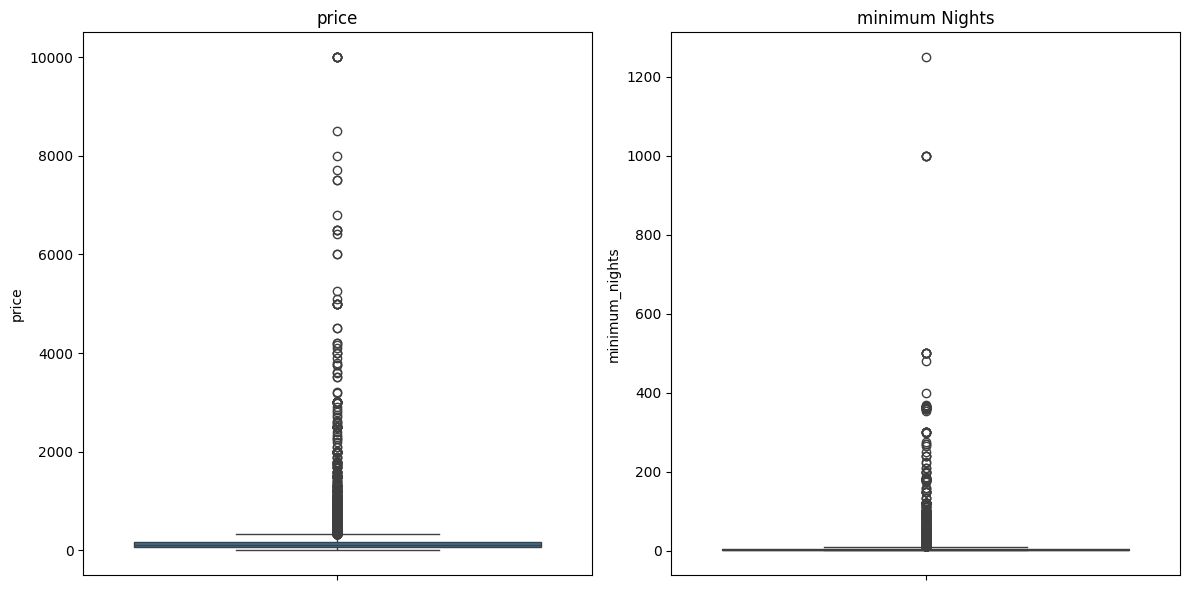

In [60]:
# Tamaño
plt.figure(figsize=(12, 6))
# uno para price y otro para minimum_nights
plt.subplot(1, 2, 1)
sns.boxplot(y=df["price"])
plt.title("price")
plt.subplot(1, 2, 2)
sns.boxplot(y=df["minimum_nights"])
plt.title("minimum Nights")

# graficos
plt.tight_layout()
plt.show()

-Price : La mayoría de los datos están agrupados en la parte baja de la escala, lo que indica que la mayoría de los alojamientos tienen precios bajos o moderados, hay muchos outliers en los precios, superando ampliamente el rango típico.

-minimun_nights : muchos valores extremos, la mayoria de los datos estan concentrados en valores pequeños, entre 1 y 10 noches, 

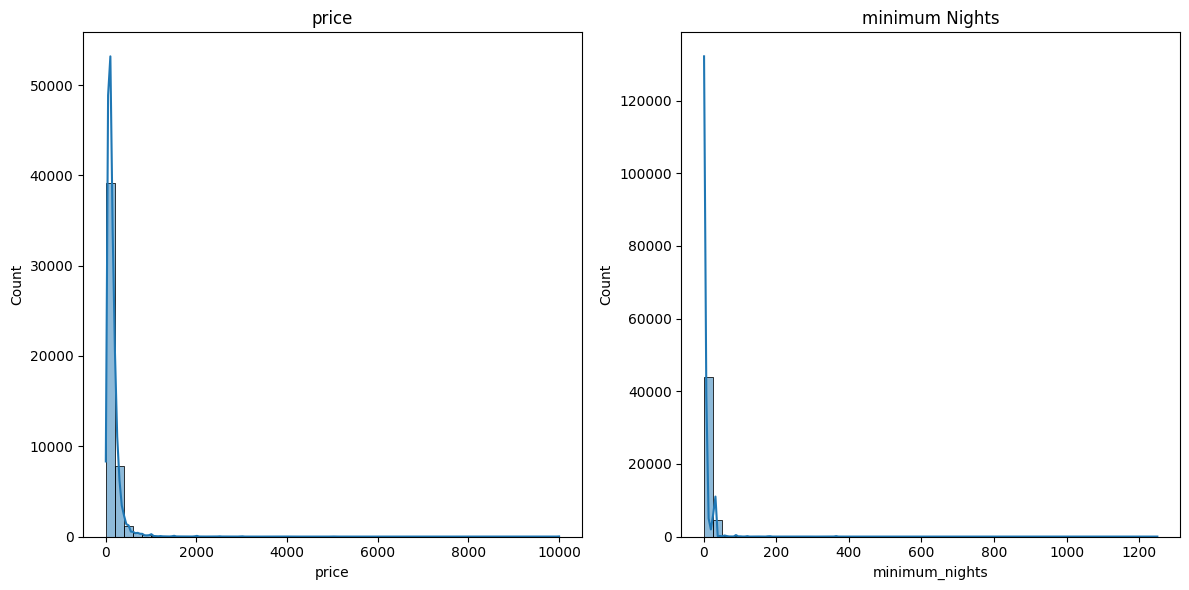

In [61]:
# tamaño
plt.figure(figsize=(12, 6))
# uno para price y otro para minimum_nights
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True)
plt.title("price")
plt.subplot(1, 2, 2)
sns.histplot(df["minimum_nights"], bins=50, kde=True)
plt.title("minimum Nights")
plt.tight_layout()
plt.show()

- price : La mayor parte de los precios están concentrados en valores bajos, lo que sugiere que la mayoría de los alojamientos tienen precios accesibles, La curva KDE muestra un pico fuerte en el rango bajo y luego una disminución brusca, lo que confirma la presencia de valores extremos.

- minimun_nights : la mayoria de los alojamientos rquieren pocas noches mínimas(entre 1 y 5 noches)

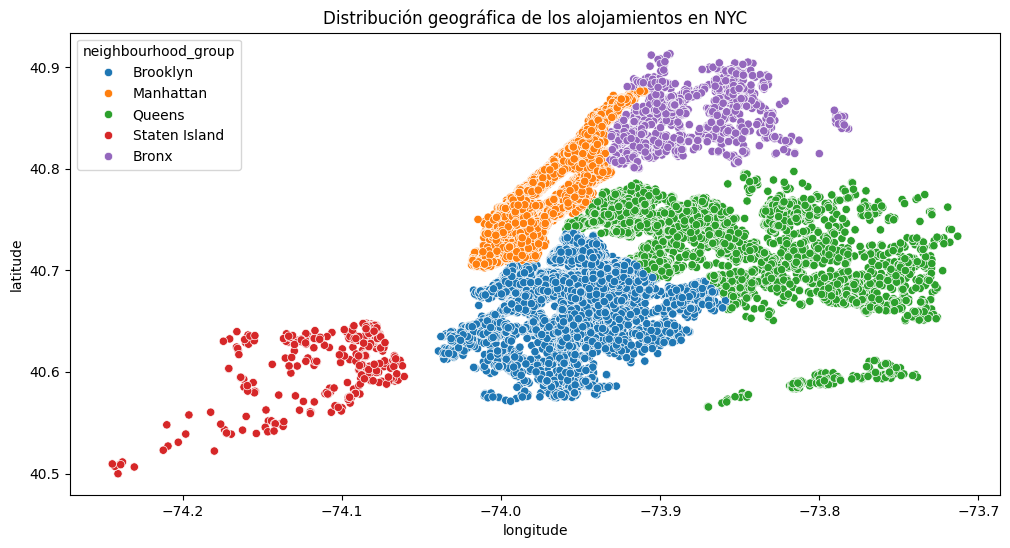

In [62]:
# Análisis de ubicaciones
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'])
plt.title("Distribución geográfica de los alojamientos en NYC")
plt.show()

In [63]:
# numero total de valores nulos en cada columna
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Last_review, reviews_per_month confirman que muchos alojamientos no han recibido reseñas, name y host_name se podrian eliminar o relleñar.

In [64]:
# Eliminar filas con valores nulos.
df.dropna(subset=["name", "host_name"], inplace=True)

In [65]:
# Relleno con 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [66]:
# Relleno con "Sin reseñas"
df["last_review"] = df["last_review"].fillna("Sin reseñas")
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

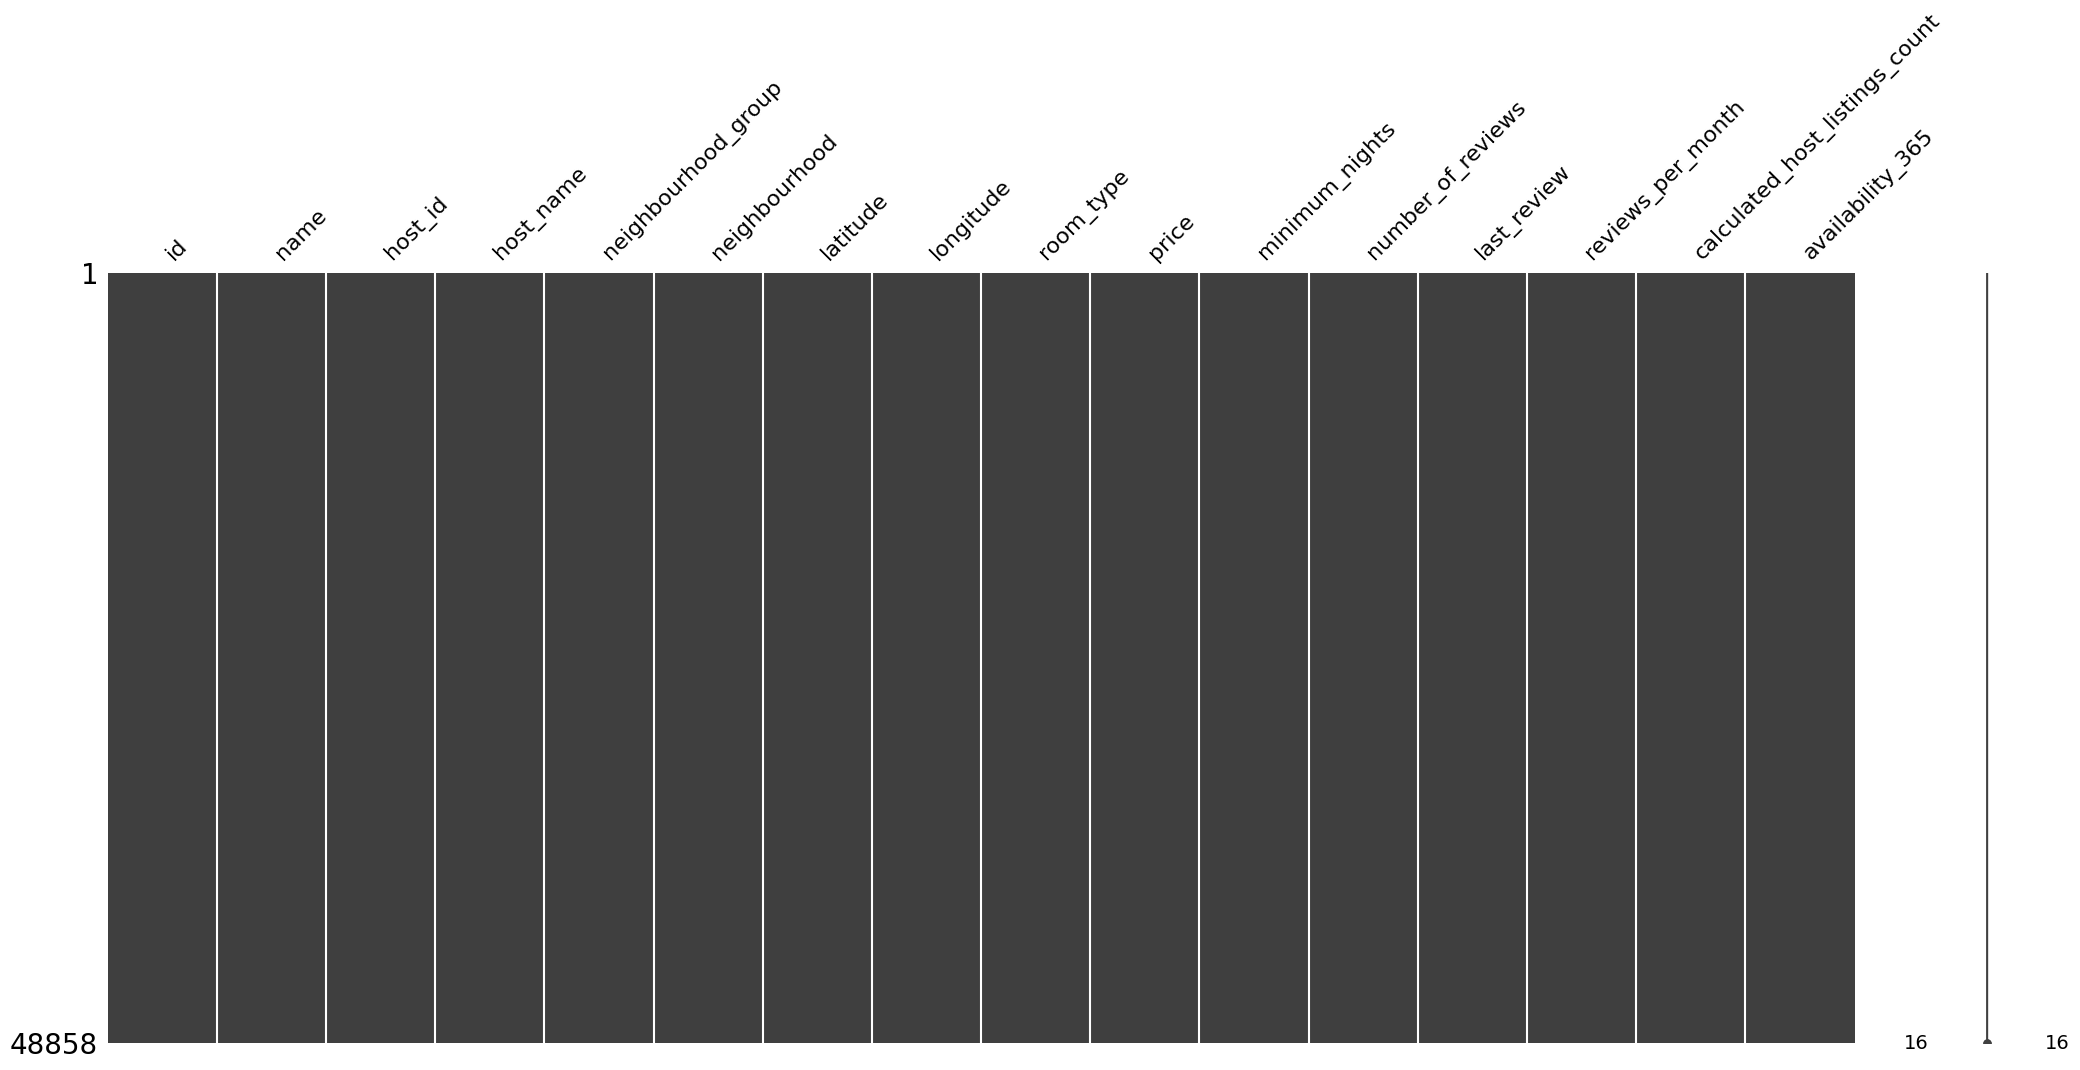

In [67]:
# Matriz de valores nulos
msno.matrix(df)
plt.show()

In [68]:
# train y test.
X = df.drop(columns=["price"])  # Todas las columnas excepto price
y = df["price"]  # variable objetivo

# Entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenamiento----->", X_train.shape)
print("Prueba----->", X_test.shape)

Entrenamiento-----> (39086, 15)
Prueba-----> (9772, 15)


In [69]:
print(X_train.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [70]:
print(y_train.dtypes)

int64


In [71]:
# Convertir columnas  categoricas en variables ( 0 y 1)
X_train = pd.get_dummies(X_train, columns=["room_type", "neighbourhood_group"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["room_type", "neighbourhood_group"], drop_first=True)

In [72]:
# Elimina columnas innecesarias 
X_train = X_train.drop(columns=["name", "host_name", "neighbourhood", "last_review"])
X_test = X_test.drop(columns=["name", "host_name", "neighbourhood", "last_review"])
print(X_train.dtypes)

id                                     int64
host_id                                int64
latitude                             float64
longitude                            float64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
room_type_Private room                  bool
room_type_Shared room                   bool
neighbourhood_group_Brooklyn            bool
neighbourhood_group_Manhattan           bool
neighbourhood_group_Queens              bool
neighbourhood_group_Staten Island       bool
dtype: object


In [73]:
# Convertir solo las columnas booleanas a int
bool_cols = X_train.select_dtypes(include=["bool"]).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Verificar tipos de datos después de la conversión
print(X_train.dtypes)

id                                     int64
host_id                                int64
latitude                             float64
longitude                            float64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
room_type_Private room                 int64
room_type_Shared room                  int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
dtype: object


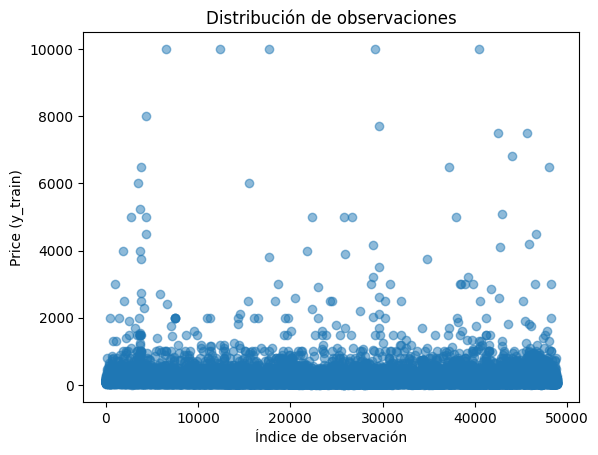

In [74]:
plt.scatter(X_train.index, y_train, alpha=0.5)
plt.xlabel('Índice de observación')
plt.ylabel('Price (y_train)')
plt.title('Distribución de observaciones')
plt.show()

Concentracion en precios bajos, presencia de valores extremos, sesgos en la distribucion, es posible que se necesite normalizar o eliminar outliers.

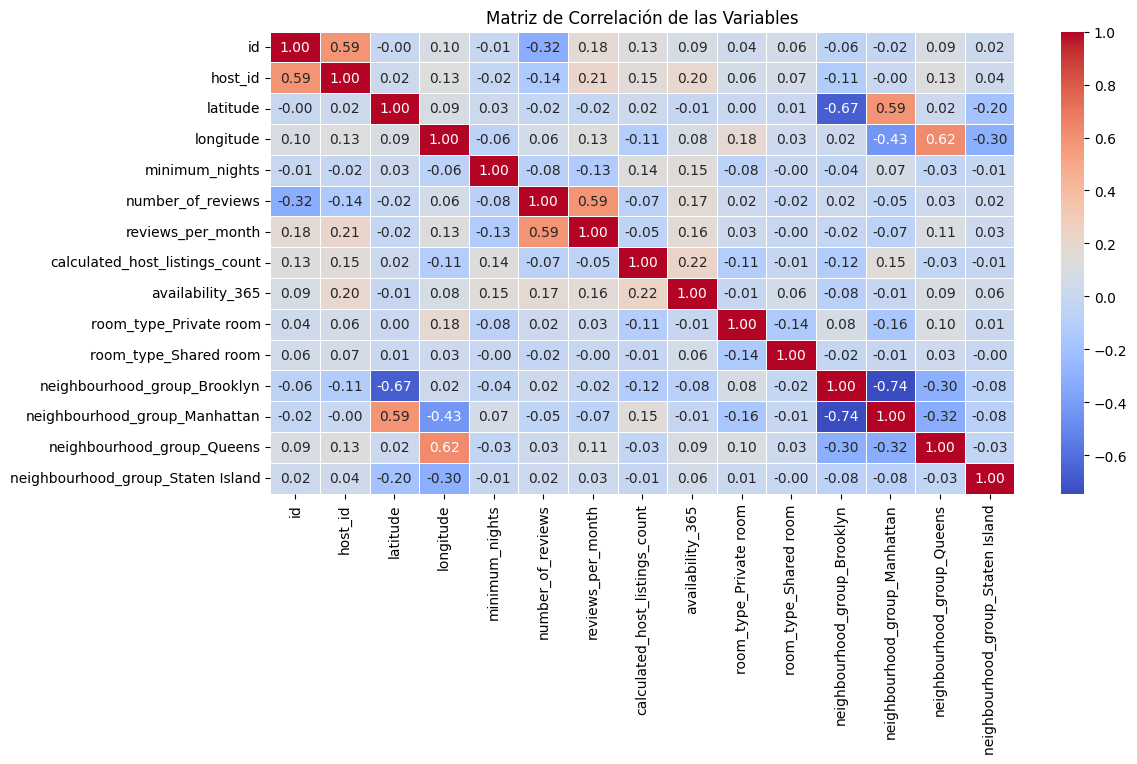

In [75]:
# Matriz correlacion
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.show()

Latitude y longitude tienen una correlación baja entre sí pero son fundamentales para la ubicación.
Minimum_nights y price muestran una relación débil, lo que indica que la cantidad mínima de noches no influye demasiado en el precio.
Number_of_reviews y reviews_per_month tienen una correlación alta, lo cual es esperable porque más reseñas implican más frecuencia de comentarios.
Calculated_host_listings_count y availability_365 están relacionadas, lo que sugiere que anfitriones con más propiedades pueden tener una mayor disponibilidad.

In [76]:
# Calcular correlación de todas las variables numéricas con el precio
correlaciones = X_train.corrwith(y_train).sort_values(ascending=False)
# Mostrar resultados
print(correlaciones)

neighbourhood_group_Manhattan        0.164249
availability_365                     0.081454
calculated_host_listings_count       0.056642
minimum_nights                       0.034893
latitude                             0.033419
host_id                              0.013656
id                                   0.008576
neighbourhood_group_Staten Island   -0.013178
number_of_reviews                   -0.048713
reviews_per_month                   -0.051908
room_type_Shared room               -0.054483
neighbourhood_group_Queens          -0.083758
neighbourhood_group_Brooklyn        -0.096593
longitude                           -0.149850
room_type_Private room              -0.238060
dtype: float64


Neighbourhood_group_Manhattan (0.16): La ubicación en Manhattan tiene la correlación más alta con el precio, lo que indica que alojarse en esta zona tiende a ser más costoso.
Availability_365 (0.08): A mayor disponibilidad anual, parece haber una ligera tendencia a precios más altos.
Room_type_Private room (-0.24): Ser una "Private room" tiene una correlación negativa fuerte con el precio, lo que significa que este tipo de alojamiento suele ser más barato en comparación con "Entire home/apt".
Longitude (-0.15): La ubicación en términos de longitud tiene un impacto negativo en el precio. Esto podría reflejar que ciertas áreas más al este tienden a tener precios más bajos.
Number_of_reviews y Reviews_per_month (-0.05): Más reseñas y actividad mensual parecen estar asociadas con precios más bajos, lo que sugiere que alojamientos más populares pueden tener tarifas más accesibles.

/tmp/ipykernel_506/2734721857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette="coolwarm")


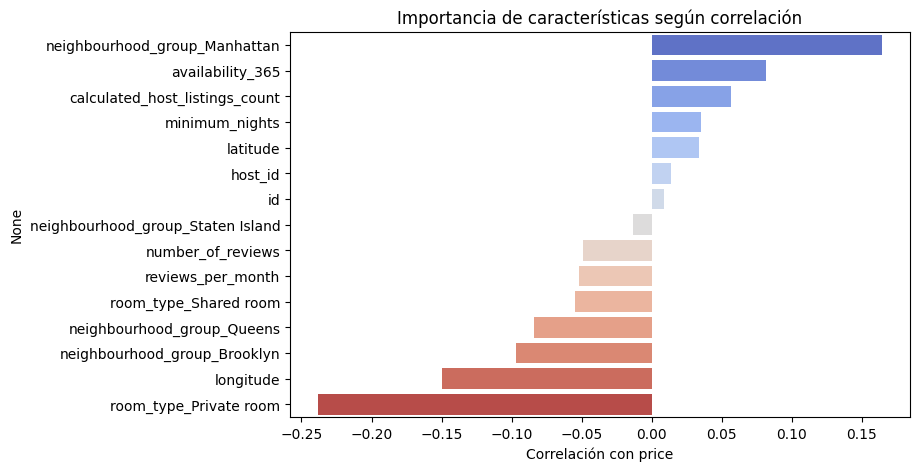

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette="coolwarm")
plt.xlabel("Correlación con price")
plt.title("Importancia de características según correlación")
plt.show()

Las variables con mayor impacto,neighbourhood_group_Manhattan con una correlación positiva, y room_type_Private room con la correlación negativa más fuerte.
longitude y neighbourhood_group_Brooklyn tienen correlaciones negativas, estas zonas pueden tener tarifas más accesibles.

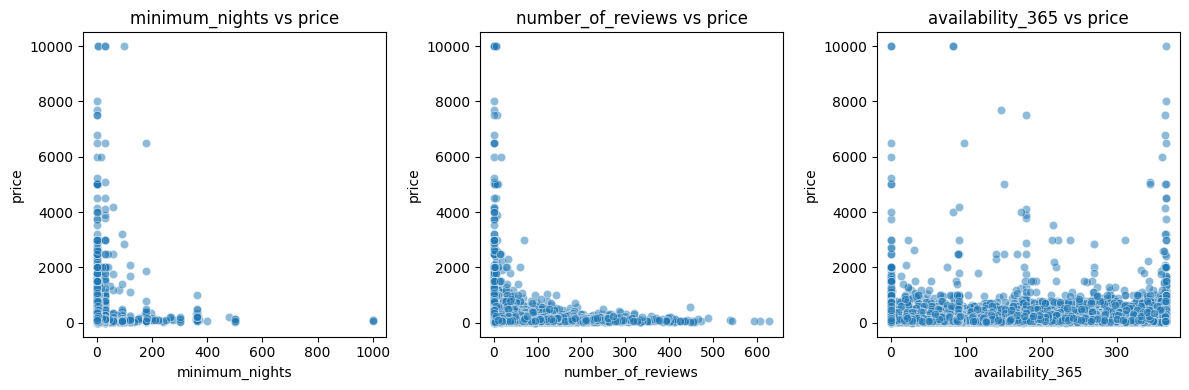

In [78]:
# Relación de algunas variables con price
features = ["minimum_nights", "number_of_reviews", "availability_365"]
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.5)
    plt.title(f"{feature} vs price")
plt.tight_layout()
plt.show()

minimum_nights vs price: La mayoría de los valores están concentrados en estadías cortas, pero hay excepciones con precios elevados en largas estadías. Esto sugiere que algunos alojamientos con requisitos de muchas noches tienen precios extremos.
number_of_reviews vs price: Propiedades con un número alto de reseñas suelen tener precios más bajos. Esto puede deberse a que alojamientos más accesibles reciben más huéspedes y, por lo tanto, más comentarios.
availability_365 vs price: Los precios más altos tienden a estar asociados con menor disponibilidad anual, lo que podría indicar que alojamientos exclusivos tienen menos disponibilidad para reservas.

In [79]:
# Calcular VIF para cada característica
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Variable,VIF
0,id,1.930434
1,host_id,2.864279
2,latitude,1.794973
3,longitude,0.393354
4,minimum_nights,1.065265
5,number_of_reviews,2.201377
6,reviews_per_month,2.047778
7,calculated_host_listings_count,1.145145
8,availability_365,1.187505
9,room_type_Private room,1.092792


neighbourhood_group_Brooklyn (17.3) y neighbourhood_group_Manhattan (14.2) muestran altos niveles de colinealidad, lo que significa que están muy correlacionadas con otras variables del conjunto de datos.
Eliminar neighbourhood_group_Brooklyn, ya que Manhattan tiene la correlación más fuerte con price

In [80]:
# Eliminar neighbourhood_group_Brooklyn
X_train = X_train.drop(columns=["neighbourhood_group_Brooklyn"])
X_test = X_test.drop(columns=["neighbourhood_group_Brooklyn"])
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Variable,VIF
0,id,1.930108
1,host_id,2.856872
2,latitude,1.201057
3,longitude,666965.903348
4,minimum_nights,1.065064
5,number_of_reviews,2.201372
6,reviews_per_month,2.047770
7,calculated_host_listings_count,1.143146
8,availability_365,1.183635
9,room_type_Private room,1.088824


Un valor tan alto sugiere que longitude está casi perfectamente correlacionado con otra variable, probablemente latitude, eliminar longitude y volver a calcular el VIF.

In [81]:
# Eliminar longitude
X_train = X_train.drop(columns=["longitude"])
X_test = X_test.drop(columns=["longitude"])
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Variable,VIF
0,id,7.717963
1,host_id,2.855563
2,latitude,8.350036
3,minimum_nights,1.199622
4,number_of_reviews,2.806008
5,reviews_per_month,2.998376
6,calculated_host_listings_count,1.186403
7,availability_365,2.049058
8,room_type_Private room,1.971332
9,room_type_Shared room,1.060175


latitude sigue teniendo un VIF alto, procederemos a transformar en una variable de distancia al centro de NY para mejorar la estabilidad y eliminar id

In [ ]:
# Coordenadas aproximadas de Times Square, Nueva York
nyc_center_lat, nyc_center_long = 40.7580, -73.9855

# Función para calcular la distancia euclidiana en coordenadas geográficas
def calcular_distancia(lat):
    return np.sqrt((lat - nyc_center_lat)**2)

# Aplicar transformación
X_train["distance_to_center"] = X_train["latitude"].apply(calcular_distancia)
X_test["distance_to_center"] = X_test["latitude"].apply(calcular_distancia)

# Eliminar las variables originales que ya no necesitamos
X_train = X_train.drop(columns=["latitude", "id"])
X_test = X_test.drop(columns=["latitude", "id"])
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Variable,VIF
0,host_id,2.188119
1,minimum_nights,1.180035
2,number_of_reviews,2.236233
3,reviews_per_month,2.616648
4,calculated_host_listings_count,1.182167
5,availability_365,2.030668
6,room_type_Private room,1.849940
7,room_type_Shared room,1.057783
8,neighbourhood_group_Manhattan,1.522095
9,neighbourhood_group_Queens,1.281183


Todas las variables tienen VIF <5, lo que indica que no hay problemas graves de colinealidad.

In [ ]:
# Scalar.
scaler = MinMaxScaler()

# Ajustar y transformar datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar datos de prueba con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance_to_center
0,0.033870,0.029058,0.014308,0.006496,0.046012,0.931507,0.0,0.0,1.0,0.0,0.0,0.040006
1,0.010281,0.029058,0.004769,0.007692,0.021472,0.605479,1.0,0.0,0.0,0.0,0.0,0.279424
2,0.003285,0.005010,0.012719,0.001538,0.000000,0.682192,1.0,0.0,0.0,0.0,0.0,0.188606
3,0.207961,0.001002,0.158983,0.052821,0.024540,0.945205,1.0,0.0,1.0,0.0,0.0,0.209326
4,0.032659,0.002004,0.073132,0.022222,0.006135,0.813699,0.0,0.0,1.0,0.0,0.0,0.184733


Los datos están normalizados dentro del rango [0,1], lo que facilitará la interpretación y el rendimiento en modelos basados en distancia